<a href="https://colab.research.google.com/github/Martishamao/Music-Industry-Sales/blob/main/Music_Industry_Sales.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Data Visualization Exercise (Practice)
- Martisha Owens
- 9/7/2022

## 1. Choose a data set from the Data Sets list.

- Data Set Selected: 2020/W21: Visualizing 40 Years of Music Industry Sales
- https://data.world/makeovermonday/2020w21-visualizing-40-years-of-music-industry-sales
<img src="https://2oqz471sa19h3vbwa53m33yj-wpengine.netdna-ssl.com/wp-content/uploads/2018/10/physical-vs-digital.png">

## 2.Download the data that you chose.

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
df = pd.read_excel('https://query.data.world/s/ssx526wayw7wjeqaahp4npoclbemdc')
df.head()

,Format,Metric,Year,Number of Records,Value (Actual)
0,CD,Units,1973,1,NaN
1,CD,Units,1974,1,NaN
2,CD,Units,1975,1,NaN
3,CD,Units,1976,1,NaN
4,CD,Units,1977,1,NaN


In [ ]:
#df[(df['Format']=='8 - Track')& (df['Year']==1973)]
df.iloc[1927]
#df.iloc[1000]

,Format,Metric,Year,Number of Records,Value (Actual)
282,8 - Track,Units,1973,1,91.000000
1000,8 - Track,Value,1973,1,489.000000
1927,8 - Track,Value (Adjusted),1973,1,2815.681824


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3008 entries, 0 to 3007
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Format             3008 non-null   object 
 1   Metric             3008 non-null   object 
 2   Year               3008 non-null   int64  
 3   Number of Records  3008 non-null   int64  
 4   Value (Actual)     1351 non-null   float64
dtypes: float64(1), int64(2), object(2)
memory usage: 117.6+ KB


In [ ]:
df.describe()

,Year,Number of Records,Value (Actual)
count,3008.000000,3008.0,1351.000000
mean,1996.000000,1.0,781.291237
std,13.566915,0.0,2246.837672
min,1973.000000,1.0,-7.650944
25%,1984.000000,1.0,3.700228
50%,1996.000000,1.0,63.900000
75%,2008.000000,1.0,448.900000
max,2019.000000,1.0,19667.327786


In [ ]:
dtypes = df.dtypes
df_obj = dtypes[dtypes=='object'].index
for i in df_obj:
  print(i)
  print(df[i].value_counts(dropna=False))
  print('\n\n')

Format
CD                                    141
DVD Audio                             141
Ringtones & Ringbacks                 141
Download Music Video                  141
Kiosk                                 141
CD Single                             141
Download Single                       141
SACD                                  141
Download Album                        141
Music Video (Physical)                141
Other Tapes                           141
8 - Track                             141
Vinyl Single                          141
LP/EP                                 141
Cassette Single                       141
Cassette                              141
Paid Subscriptions                     94
Limited Tier Paid Subscription         94
On-Demand Streaming (Ad-Supported)     94
Other Ad-Supported Streaming           94
Other Digital                          94
Paid Subscription                      94
SoundExchange Distributions            94
Synchronization            

##3. Use Python to create a visually appealing, informative visualization using the data you selected.

/usr/local/lib/python3.7/dist-packages/seaborn/relational.py:514: MatplotlibDeprecationWarning: Saw kwargs ['c', 'color'] which are all aliases for 'color'.  Kept value from 'color'.  Passing multiple aliases for the same property will raise a TypeError in 3.3.
  line, = ax.plot([], [], **kws)
/usr/local/lib/python3.7/dist-packages/seaborn/relational.py:529: MatplotlibDeprecationWarning: Saw kwargs ['c', 'color'] which are all aliases for 'color'.  Kept value from 'color'.  Passing multiple aliases for the same property will raise a TypeError in 3.3.
  line, = ax.plot(x, y, **kws)


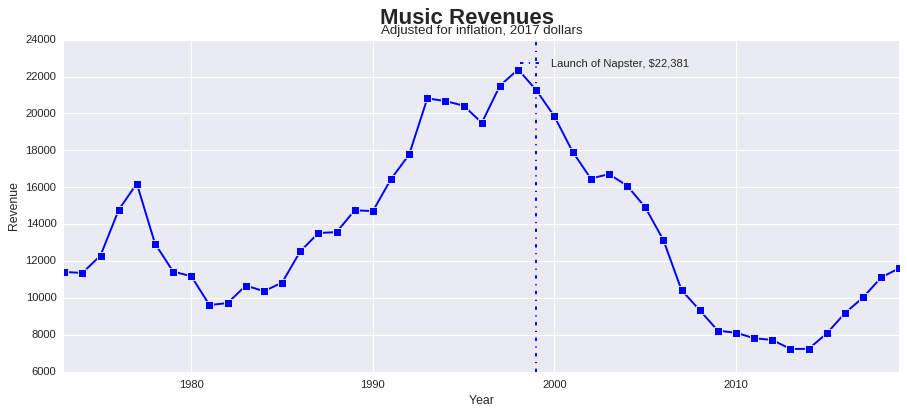

In [277]:
fig, ax = plt.subplots(nrows = 1, figsize = (12,5))
plt.style.use('seaborn')

df_yr = df[df['Metric']=='Value (Adjusted)'].groupby(['Year'])['Value (Actual)'].sum()

ax = sns.lineplot(data=df, x = 'Year', y = df_yr, marker = 's',c = 'blue')

ax.set_ylabel('Revenue')
ax.set_xlim(left=1973, right = 2019)
ax.ticklabel_format(useOffset=False)
plt.title('Adjusted for inflation, 2017 dollars')
fig.suptitle('Music Revenues', fontsize = 20, fontweight = 'bold');

ax.axvline(df_yr.idxmax(), c = 'blue', linestyle = '-.', label=f"Launch of Napster, ${df_yr.max():,.0f}")
ax.legend(loc=(0.54,.9));

- (useOffset=False), https://stackoverflow.com/questions/28371674/prevent-scientific-notation-in-matplotlib-pyplot

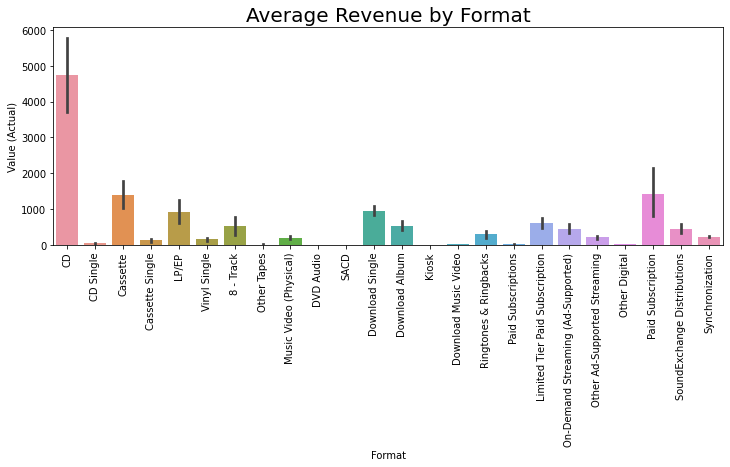

In [ ]:
fig, ax = plt.subplots(ncols=1, figsize=(12,4))

ax = sns.barplot(data=df, x='Format', y = 'Value (Actual)')

ax.tick_params(axis='x', rotation=90)
ax.set_title('Average Revenue by Format',fontsize = 20);

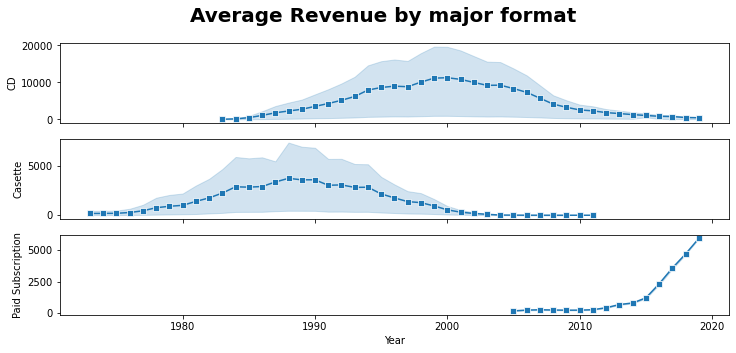

In [ ]:
fig, axes = plt.subplots(nrows = 3, figsize = (12,5), sharex = True)

sns.lineplot(data=df[df['Format']=='CD'], x = 'Year', y = 'Value (Actual)', marker = 's', ax = axes[0])

sns.lineplot(data=df[df['Format']=='Cassette'], x = 'Year', y = 'Value (Actual)', marker = 's', ax = axes[1])

sns.lineplot(data=df[df['Format']=='Paid Subscription'], x = 'Year', y = 'Value (Actual)', marker = 's', ax = axes[2])

for i,x in zip(range(0,3),['CD','Casette','Paid Subscription']):
  axes[i].set_ylabel(x)

fig.suptitle('Average Revenue by major format', fontsize = 20, fontweight = 'bold');

> Zip, https://stackoverflow.com/questions/17006641/single-line-nested-for-loops